### CNN Architectures

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

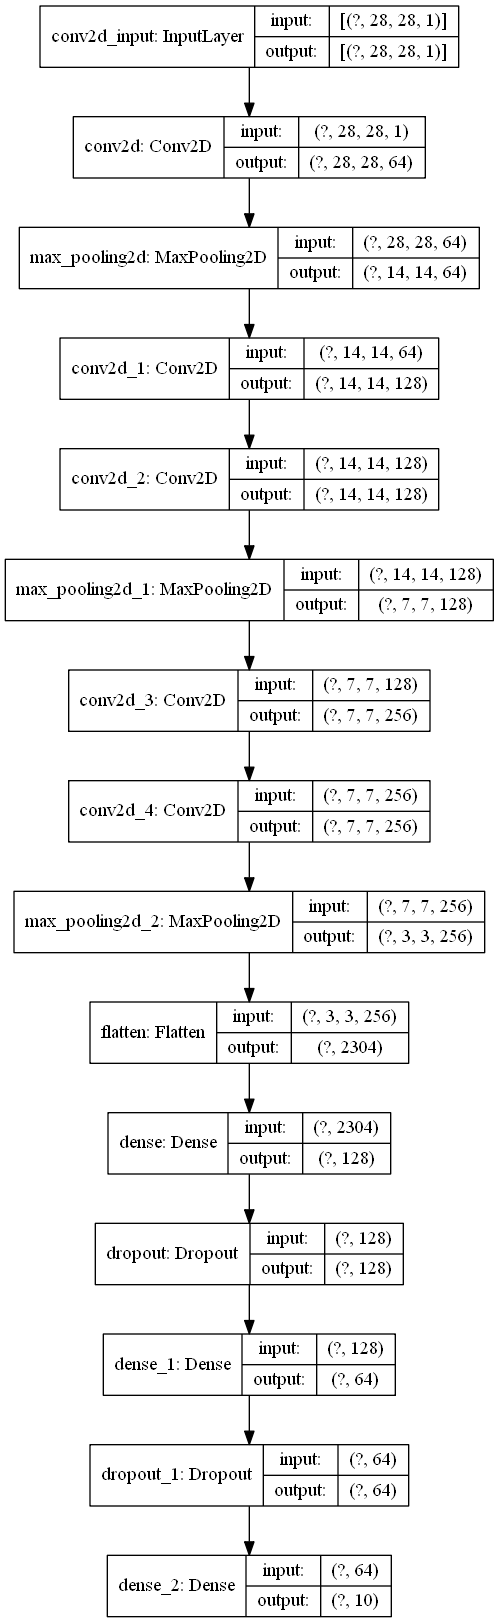

In [4]:
keras.utils.plot_model(model, "my_cnn_mnist__model.png", show_shapes=True)

In [5]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
#X_train = X_train/255.0
#X_test = X_test/255.0

In [9]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std



In [10]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

#X_train = X_train[..., np.newaxis]

#X_test = X_test[..., np.newaxis]

In [11]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_split=0.10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 521s 10ms/sample - loss: 1.1939 - accuracy: 0.5652 - val_loss: 0.6323 - val_accuracy: 0.7497
Epoch 2/10
54000/54000 [==============================] - 514s 10ms/sample - loss: 0.6980 - accuracy: 0.7440 - val_loss: 0.4984 - val_accuracy: 0.8143
Epoch 3/10
54000/54000 [==============================] - 506s 9ms/sample - loss: 0.5781 - accuracy: 0.7932 - val_loss: 0.4266 - val_accuracy: 0.8463
Epoch 4/10
54000/54000 [==============================] - 509s 9ms/sample - loss: 0.5150 - accuracy: 0.8185 - val_loss: 0.3944 - val_accuracy: 0.8593
Epoch 5/10
54000/54000 [==============================] - 512s 9ms/sample - loss: 0.4741 - accuracy: 0.8352 - val_loss: 0.3799 - val_accuracy: 0.8632
Epoch 6/10
54000/54000 [==============================] - 508s 9ms/sample - loss: 0.4353 - accuracy: 0.8498 - val_loss: 0.3468 - val_accuracy: 0.8745
Epoch 7/10
54000/54000 [=========================

In [24]:
model.evaluate(X_test, y_test,verbose=2)

10000/1 - 17s - loss: 0.2159 - accuracy: 0.8781


[0.33015995272397997, 0.8781]

## Using the model to make predictions and Saving the Model

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

**Let us see ground truths**

In [18]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [22]:
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [20]:
model.save("my_first_cnn_model.h5")

**Exercise:** Load this saved model and use it to predict the last ten examples/instances of test set and compare the results with the ground truths.